## Transfer Learning Using CNN



With transfer learning, instead of starting the learning process from scratch, you start from patterns that have been learned when solving a new related problem. So we reuse initial and middle layers of our pre-trained model to re-train only final layers for our new task. A pre-trained model denotes a model that was trained on a large benchmark dataset to solve a problem similar to the one that we want to solve.


Fine tuning is a way of appliying or utilizing transfer learning. Specifically fine tuning is a process that takes a model that's already been trained for a given task and then tuning or tweaking that model to make it perform a second similiar task. If the two tasks are different and there will be some information that the model has learned that may not apply to our new task or there may be new information that the model needs to learn from the data regarding the new task that wasn't learned from the previous task. 



### Assignment


In this assignment, you will implement a transfer learning approach by using clinical images for a binary image classification task. The dataset consists of skin cancer images which are labeled as melanomas, nevus, and seborrheic keratoses. You will show the ability of your CNN to distinguish between malignant melanoma and benign skin lesions (nevus, seborrheic keratosis).  So you will create a binary classification model for Melanoma vs Nevus and Seborrheic keratosis. You will use pre-trained models which are two different CNN architectures (VGG16 and ResNet50) available in Pytorch [1]. Follow the steps below  to complete the assignment.

[1]: https://pytorch.org/vision/stable/models.html

**Steps**:

![2.PNG](attachment:2.PNG)


- Obtain the pre-trained model

The first step is to get the pre-trained model that is already given to you. You get pre-trained weights alongside each model. When you download a model, the weights are downloaded automatically. 

TorchVision offers pre-trained weights for every provided architecture, using the PyTorch *torch.hub* [2]. Instancing a pre-trained model will download its weights to a cache directory. This directory can be set using the TORCH_HOME environment variable. See *torch.hub.load_state_dict_from_url()*[3] for details.`

- Create a base model

The first step is to instantiate the base model using the architectures as VGG16 and ResNet50 separately. Download the pre-trained weights. If you don’t download the weights, you will have to use the architecture to train your model from scratch. Recall that the base model will usually have more units in the final output layer than you require. When creating the base model, you, therefore, have to remove the final output layer. Later on, you will add a final output layer that is compatible with your problem. 

- Freeze layers so they don’t change during training

Freezing the layers from the pre-trained model is important when using transfer learning or fine-tuning the model. This is because you don't want the weights in those layers to be significantly altered, as this may degrade the model's pre-existing knowledge. If the weights are changed too much, then the benefits of using a pre-trained model could be diminished, making it similar to training the model from scratch. However, it's worth noting that in some cases, fine-tuning might involve updating the weights of the pre-trained model, but with a smaller learning rate, so that the pre-existing knowledge is fine-tuned to the new task without being lost entirely. In such cases, the layers are not frozen but are still carefully updated to prevent losing the initial learning. 

- Add new trainable layers

The next step is to add new trainable layers that will turn old features into predictions on the new dataset. This is important because the pre-trained model is loaded without the final output layer. 

- Train the new layers on the dataset

Remember that the pre-trained model’s final output will most likely be different from the output that you want for your model.  You will add some new dense layers as you please, but most importantly, a final dense layer with units corresponding to the number of outputs expected by your model. 

- Improve the model via fine-tuning

Once you have done the previous step, you will have a model that can make predictions on your dataset. Now improve its performance through fine-tuning.

- Summarize history for accuracy

Plot a graph to demonstrate accuracy scores in train versus test sets. In your plot use x-axes for epoch and y a-axes for accuracy scores.


[2]: https://pytorch.org/docs/stable/hub.html#torch.hub.load_state_dict_from_url
[3]: https://pytorch.org/docs/stable/hub.html#module-torch.hub


## Submission

After training your models with the training and validation data, use the given test data for your predictions. In order to rank your results, you need to save your test results in a CSV file containing your test predictions like sample_predictions.csv and upload the test CSV file to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition for VGG16 architecture: https://www.kaggle.com/t/7ee370dd307a47b8b182683a1e2f4a7f

Kaggle competition for ResNet50 architecture: https://www.kaggle.com/t/7f94629daea34740b9c21737e6b772a8

**Due Date**: 18.05.2023

**Note**: The late submission rules previously announced from the piazza apply.

## CODE


####Load Data

In [1]:
#Include your codes below by including as many cells as necessary to clearly demonstrate your work
#Please write your codes in separate sections for data pre-processing, VGG16 and ResNet50 architectures etc.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) 

Mounted at /content/gdrive/


In [3]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/BBM409-hw3-datasets/train.zip"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/BBM409-hw3-datasets/test.zip"
val_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/BBM409-hw3-datasets/valid.zip"

In [4]:
import zipfile
# Unzip the downloaded train file
zip_ref = zipfile.ZipFile(train_path, "r")
zip_ref.extractall()
zip_ref.close()
# Unzip the downloaded validation file
zip_ref = zipfile.ZipFile(val_path, "r")
zip_ref.extractall()
zip_ref.close()
# Unzip the downloaded test file
zip_ref = zipfile.ZipFile(test_path, "r")
zip_ref.extractall()
zip_ref.close()

####Data Visualisation

In [5]:
import os
def walk_through_dir(dir_path):
  
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  

In [7]:
train_data_path = "/content/train"
val_data_path = "/content/valid"
test_data_path = "/content/test"

In [8]:
import matplotlib.pyplot as plt

In [9]:
walk_through_dir(train_data_path)

There are 3 directories and 0 images in '/content/train'.
There are 0 directories and 254 images in '/content/train/seborrheic_keratosis'.
There are 0 directories and 374 images in '/content/train/melanoma'.
There are 0 directories and 1372 images in '/content/train/nevus'.


In [10]:
walk_through_dir(val_data_path)

There are 3 directories and 0 images in '/content/valid'.
There are 0 directories and 42 images in '/content/valid/seborrheic_keratosis'.
There are 0 directories and 30 images in '/content/valid/melanoma'.
There are 0 directories and 78 images in '/content/valid/nevus'.


In [11]:
walk_through_dir(test_data_path)

There are 0 directories and 600 images in '/content/test'.


Image shape: (2000, 3008, 3)


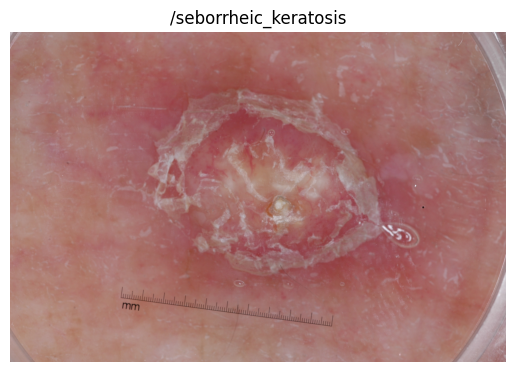

In [12]:
view_random_image(train_data_path,"/seborrheic_keratosis")

Image shape: (2848, 4288, 3)


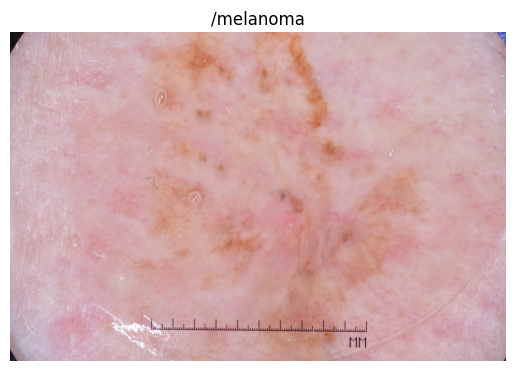

In [13]:
view_random_image(train_data_path,"/melanoma")

Image shape: (2848, 4288, 3)


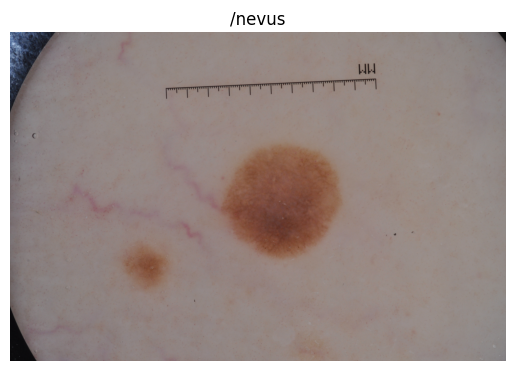

In [14]:
view_random_image(train_data_path,"/nevus")

####Data Preprocessing

In [15]:
import shutil
import os
def merge_two_directory(src_path1,src_path2,target_path):
  ## write an rsync commands to merge the directories
  #os.mkdir(target_path)
  shutil.copytree(src_path1, target_path,dirs_exist_ok=True)
  shutil.copytree(src_path2, target_path,dirs_exist_ok=True)
  

In [16]:
merge_two_directory("/content/train/nevus","/content/train/seborrheic_keratosis","/content/train/benign_skin_lesions")
merge_two_directory("/content/valid/nevus","/content/valid/seborrheic_keratosis","/content/valid/benign_skin_lesions")

In [17]:
walk_through_dir(train_data_path)

There are 4 directories and 0 images in '/content/train'.
There are 0 directories and 254 images in '/content/train/seborrheic_keratosis'.
There are 0 directories and 374 images in '/content/train/melanoma'.
There are 0 directories and 1372 images in '/content/train/nevus'.
There are 0 directories and 1626 images in '/content/train/benign_skin_lesions'.


In [18]:
walk_through_dir(val_data_path)

There are 4 directories and 0 images in '/content/valid'.
There are 0 directories and 42 images in '/content/valid/seborrheic_keratosis'.
There are 0 directories and 30 images in '/content/valid/melanoma'.
There are 0 directories and 78 images in '/content/valid/nevus'.
There are 0 directories and 120 images in '/content/valid/benign_skin_lesions'.


In [19]:
import shutil
shutil.rmtree('/content/train/nevus')
shutil.rmtree('/content/train/seborrheic_keratosis')
shutil.rmtree('/content/valid/nevus')
shutil.rmtree('/content/valid/seborrheic_keratosis')

In [20]:
walk_through_dir(train_data_path)

There are 2 directories and 0 images in '/content/train'.
There are 0 directories and 374 images in '/content/train/melanoma'.
There are 0 directories and 1626 images in '/content/train/benign_skin_lesions'.


In [21]:
walk_through_dir(val_data_path)

There are 2 directories and 0 images in '/content/valid'.
There are 0 directories and 30 images in '/content/valid/melanoma'.
There are 0 directories and 120 images in '/content/valid/benign_skin_lesions'.


In [22]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_data_path,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
val_data = val_datagen.flow_from_directory(val_data_path,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 2000 images belonging to 2 classes.
Testing images:
Found 150 images belonging to 2 classes.


####Models

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [24]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [25]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img


In [26]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  return pred_class

In [27]:
from pathlib import Path
import pandas as pd 
def pred_and_save_csv(model,csv_file_path):
    class_names=[0,1]
    test_path = "/content/test"
    pred = {}
    
    for img in os.listdir(test_path):
      predict = pred_and_plot(model,test_path+"/"+img,class_names)
      pred[img] = predict
    pred_df = pd.DataFrame.from_dict(pred,orient='index')
    filepath = Path(csv_file_path)  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    pred_df.to_csv(filepath)
    

#####VGG-16

######Baseline Model (Only Feature Extraction)

In [ ]:
tf.random.set_seed(47)
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.VGG16(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

58889256/58889256 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 512)
After GlobalAveragePooling2D(): (None, 512)


In [ ]:
# Setup checkpoint path
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoints_vgg1/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
vgg_history_1 = model_1.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data)*0.25,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 0.4817 - accuracy: 0.8130
Epoch 1: val_loss improved from inf to 0.50171, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoints/checkpoint.ckpt
63/63 [==============================] - 366s 6s/step - loss: 0.4817 - accuracy: 0.8130 - val_loss: 0.5017 - val_accuracy: 0.7969
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 0.4766 - accuracy: 0.8130
Epoch 2: val_loss improved from 0.50171 to 0.42312, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoints/checkpoint.ckpt
63/63 [==============================] - 353s 6s/step - loss: 0.4766 - accuracy: 0.8130 - val_loss: 0.4231 - val_accuracy: 0.8438
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.8130
Epoch 3: val_loss did not improve from 0.42312
63/63 [==============================] - 351s 6s/step - loss: 0.4727 - accuracy: 0.8130 - val_loss: 0.5568 - val_accuracy: 0.

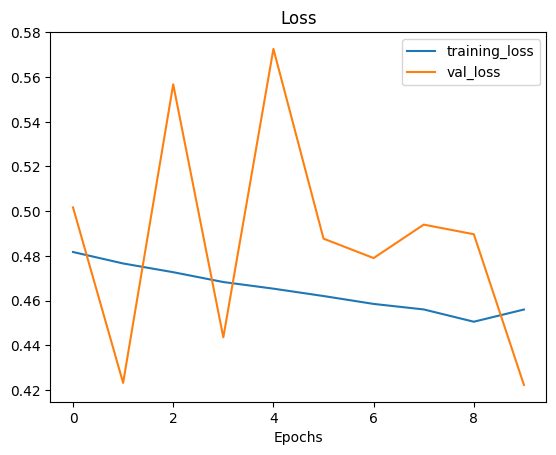

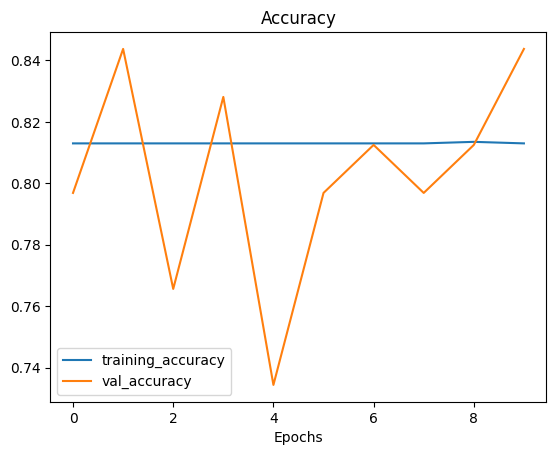

In [ ]:
plot_loss_curves(vgg_history_1)

In [ ]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
checkpoint_dir = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/vgg/model_1"
latest_weights = tf.train.latest_checkpoint(checkpoint_dir)
model_1.load_weights(latest_weights) # revert model back to saved weights

In [ ]:
csv_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/result/vgg/result_1.csv"

In [ ]:
pred_and_save_csv(model_1,csv_path)

######Model_2 (Fine Tuning)

In [63]:
tf.random.set_seed(47)
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.VGG16(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model

model_2 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

Shape after base_model: (None, 7, 7, 512)
After GlobalAveragePooling2D(): (None, 512)


In [64]:
# Setup checkpoint path
#checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/vgg/model_2c/heckpoint.ckpt" # note: remember saving directly to Colab is temporary
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/vgg/model_1_1/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

  

In [67]:
model_2.load_weights(checkpoint_path)

In [ ]:
for layer in model_2.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [37]:
# Setup checkpoint path
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/model_2/checkpoint.ckpt"  # note: remember saving directly to Colab is temporary
#checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/vgg/model_1_1"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# Refit the model (same as model_1 except with more trainable layers)
vgg_history_2 = model_2.fit(train_data,
                            epochs=10,
                            validation_data=val_data,
                            validation_steps=int(0.25 * len(val_data)),
                            callbacks=[checkpoint_callback])

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.8130
Epoch 1: val_loss improved from inf to 0.46057, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/model_2/checkpoint.ckpt
63/63 [==============================] - 375s 6s/step - loss: 0.4894 - accuracy: 0.8130 - val_loss: 0.4606 - val_accuracy: 0.8125
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 0.4620 - accuracy: 0.8125
Epoch 2: val_loss improved from 0.46057 to 0.40445, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/model_2/checkpoint.ckpt
63/63 [==============================] - 356s 6s/step - loss: 0.4620 - accuracy: 0.8125 - val_loss: 0.4044 - val_accuracy: 0.8438
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.4608 - accuracy: 0.8125
Epoch 3: val_loss did not improve from 0.40445
63/63 [==============================] - 360s 6s/step - loss: 0.4608 - accuracy: 0.8125 - val_loss: 0.5824 - val_accuracy: 0.7188
Epo

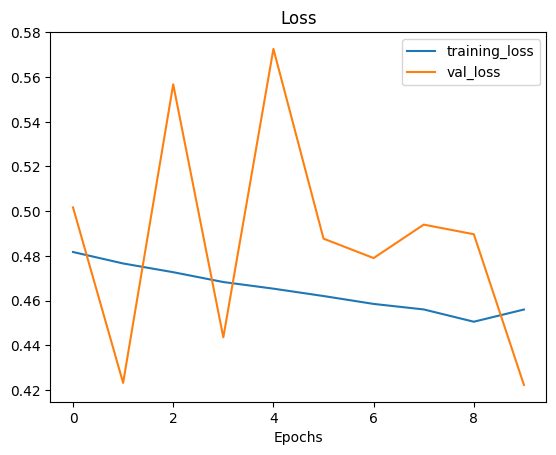

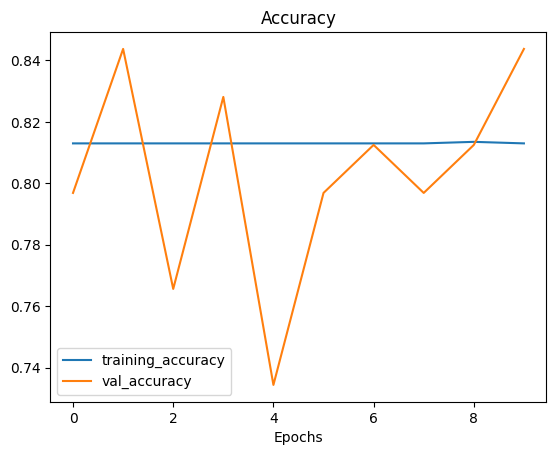

In [ ]:
plot_loss_curves(vgg_history_2)

In [68]:
csv_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/result/vgg/result_1.csv"

In [ ]:
pred_and_save_csv(model_2,csv_path)

#####ResNet50

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

######Baseline Model (Only Feature Extraction)

In [ ]:
tf.random.set_seed(47)

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet50V2(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)


In [ ]:
# Setup checkpoint path
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/resnet/model_1/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
resnet_history_1 = model_1.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data)*0.25,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 0.3701 - accuracy: 0.8390
Epoch 1: val_loss improved from inf to 0.51021, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/checkpoint.ckpt
63/63 [==============================] - 379s 6s/step - loss: 0.3701 - accuracy: 0.8390 - val_loss: 0.5102 - val_accuracy: 0.7656
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8490
Epoch 2: val_loss improved from 0.51021 to 0.47131, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/checkpoint.ckpt
63/63 [==============================] - 372s 6s/step - loss: 0.3554 - accuracy: 0.8490 - val_loss: 0.4713 - val_accuracy: 0.7969
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.3461 - accuracy: 0.8515
Epoch 3: val_loss did not improve from 0.47131
63/63 [==============================] - 357s 6s/step - loss: 0.3461 - accuracy: 0.8515 - val_loss: 0.5403 - val_accuracy: 0.78

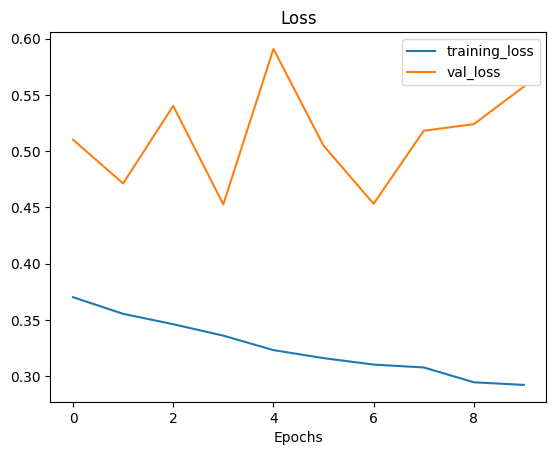

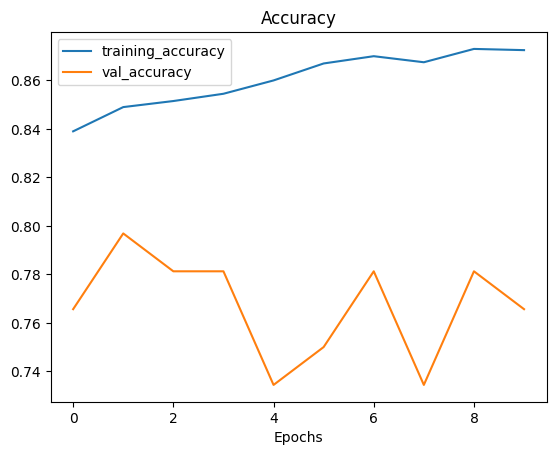

In [ ]:
plot_loss_curves(resnet_history_1)

In [ ]:
csv_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/result/resnet/result_1.csv"

In [ ]:
pred_and_save_csv(model_1,csv_path)

######Model_2 (Fine Tuning)

In [57]:
tf.random.set_seed(47)

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet50V2(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_2 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

94668760/94668760 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)


In [42]:
# Setup checkpoint path
chech_point_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/resnet/model_1/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

model_2.load_weights(chech_point_path)

In [43]:
# Layers in loaded model
model_2.layers

In [44]:

for layer in model_2.layers:
  print(layer.trainable)

True
False
True
True


In [46]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [48]:
print(len(model_2.trainable_variables))

11


In [49]:
# Setup checkpoint path
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/resnet/model_2/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [54]:
# Refit the model (same as model_2 except with more trainable layers)
resnet_history_2 = model_2.fit(train_data,
                                epochs=10,
                                validation_data=val_data,
                                validation_steps=int(0.25 * len(val_data)),
                                callbacks=[checkpoint_callback])


Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9460
Epoch 1: val_loss improved from inf to 0.41753, saving model to /content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/checkpoint/resnet/model_2/checkpoint.ckpt
63/63 [==============================] - 354s 6s/step - loss: 0.1717 - accuracy: 0.9460 - val_loss: 0.4175 - val_accuracy: 0.8438
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9775
Epoch 2: val_loss did not improve from 0.41753
63/63 [==============================] - 352s 6s/step - loss: 0.1094 - accuracy: 0.9775 - val_loss: 0.6980 - val_accuracy: 0.7812
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9965
Epoch 3: val_loss did not improve from 0.41753
63/63 [==============================] - 351s 6s/step - loss: 0.0616 - accuracy: 0.9965 - val_loss: 0.8485 - val_accuracy: 0.8750
Epoch 4/10
63/63 [==============================] - ETA: 0s - loss: 0.0333 - ac

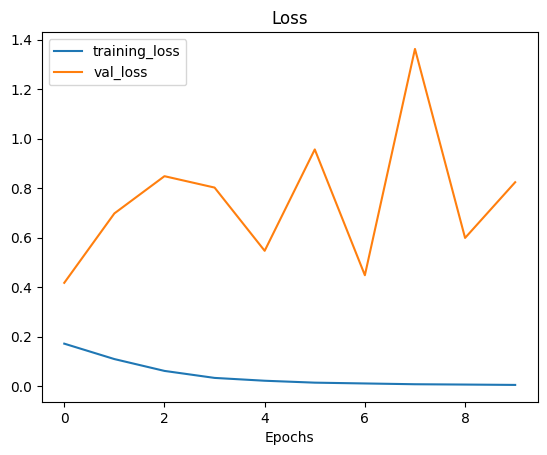

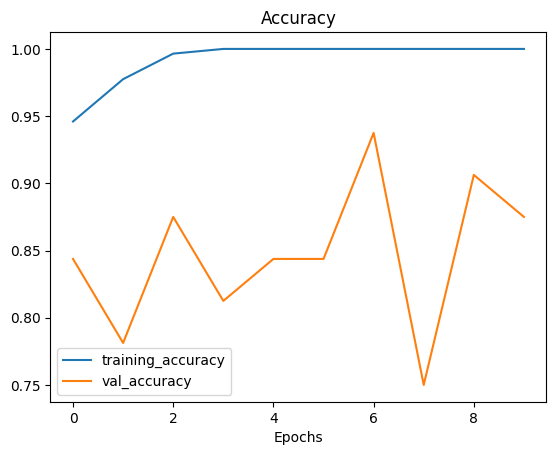

In [55]:
plot_loss_curves(resnet_history_2)

In [56]:
csv_path = "/content/gdrive/MyDrive/Colab Notebooks/HMW3-CNN/result/resnet/result_2.csv"

In [ ]:
pred_and_save_csv(model_2,csv_path)